# benchmark evaluation

In [2]:
from typing import List
from random import randint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Markdown as md
 
# configs 
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["figure.autolayout"] = True
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
df = pd.read_csv("data/benchmark_HarstemsAunt_v1.1_dev.csv")
df['started_at'] = pd.to_datetime(df['started_at'])

df = df[df['started_at'].dt.strftime('%Y-%m-%d') == '2025-03-22']

df.head()

,benchmark,bot_version,comment,branch,map,start_pos,started_at,enemy_behavior,has_creep,enemy_units,own_units,time_running,score,life_damage_dealt,shield_damage_dealt,life_damage_taken,shield_damage_taken,destroyed_enemy_units,destroyed_friendly_units,end_condition


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   benchmark                 0 non-null      object        
 1   bot_version               0 non-null      float64       
 2   comment                   0 non-null      object        
 3   branch                    0 non-null      object        
 4   map                       0 non-null      object        
 5   start_pos                 0 non-null      object        
 6   started_at                0 non-null      datetime64[ns]
 7   enemy_behavior            0 non-null      object        
 8   has_creep                 0 non-null      bool          
 9   enemy_units               0 non-null      object        
 10  own_units                 0 non-null      object        
 11  time_running              0 non-null      float64       
 12  score                     0 non-null   

TypeError: 'NoneType' object is not iterable

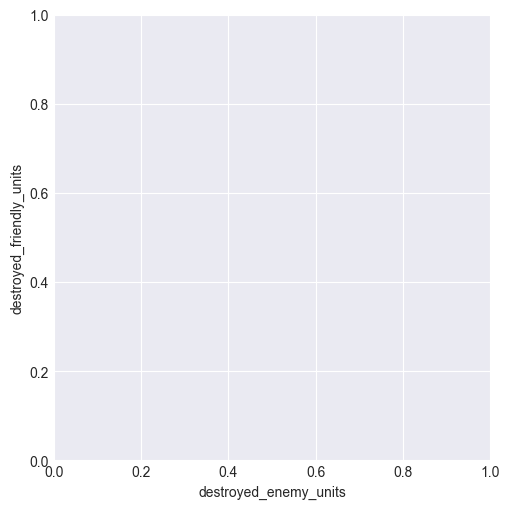

In [5]:
sns.displot(df, x="destroyed_enemy_units", y="destroyed_friendly_units", hue="enemy_behavior")

plt.grid(True)
plt.show()

In [ ]:
df = df[df['end_condition'] != 'EndCondition.TIME_OUT']

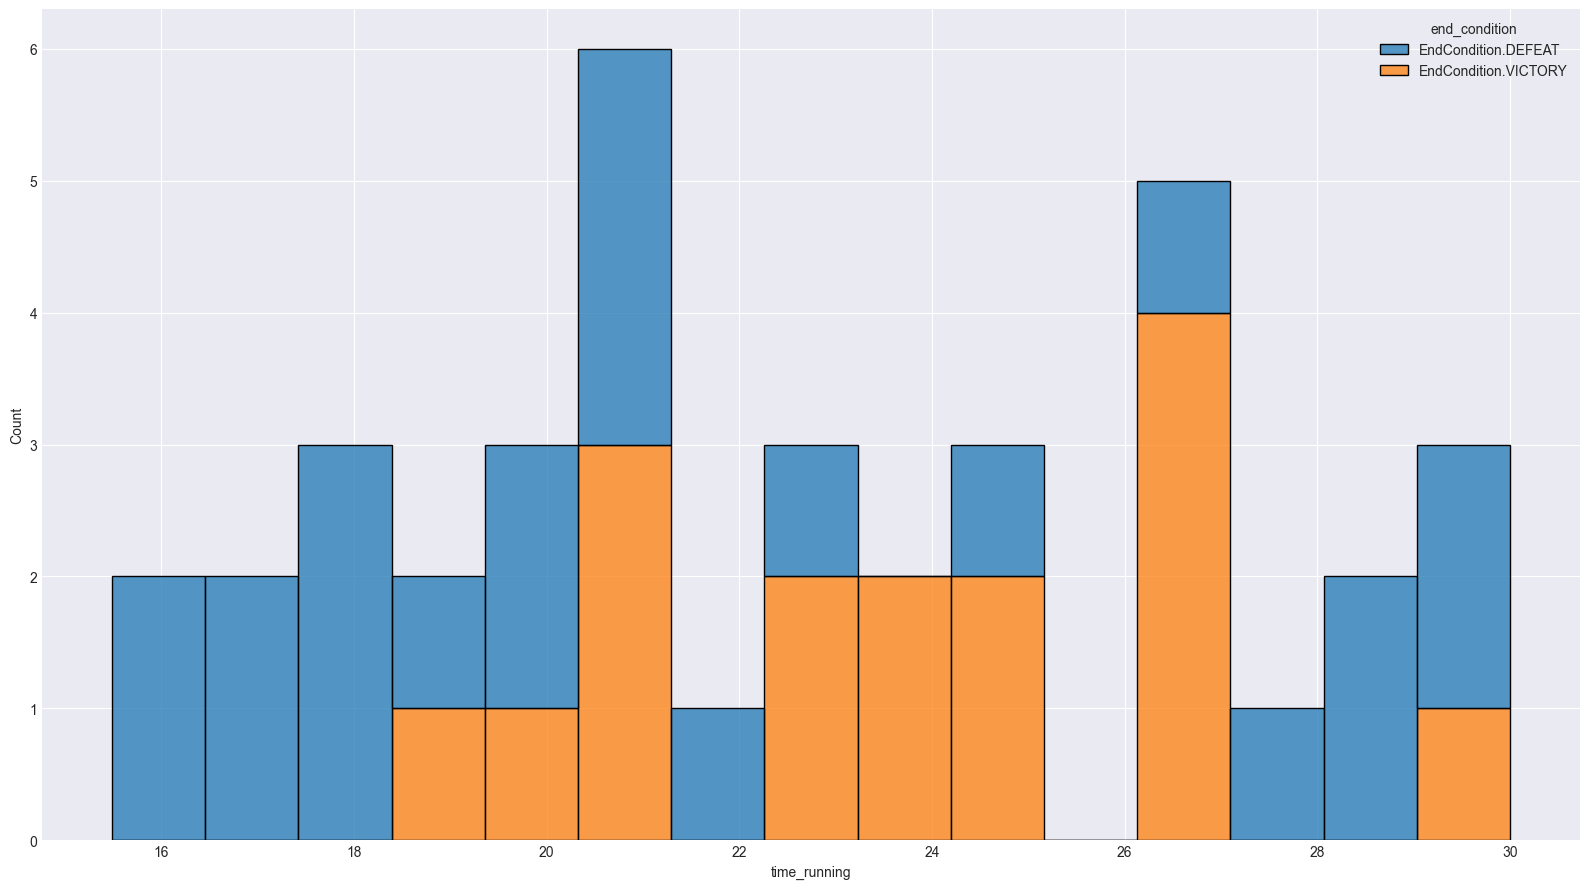

In [ ]:
sns.histplot(df, x='time_running', binwidth=1, hue="end_condition", multiple="stack")

plt.grid(True)
plt.show()

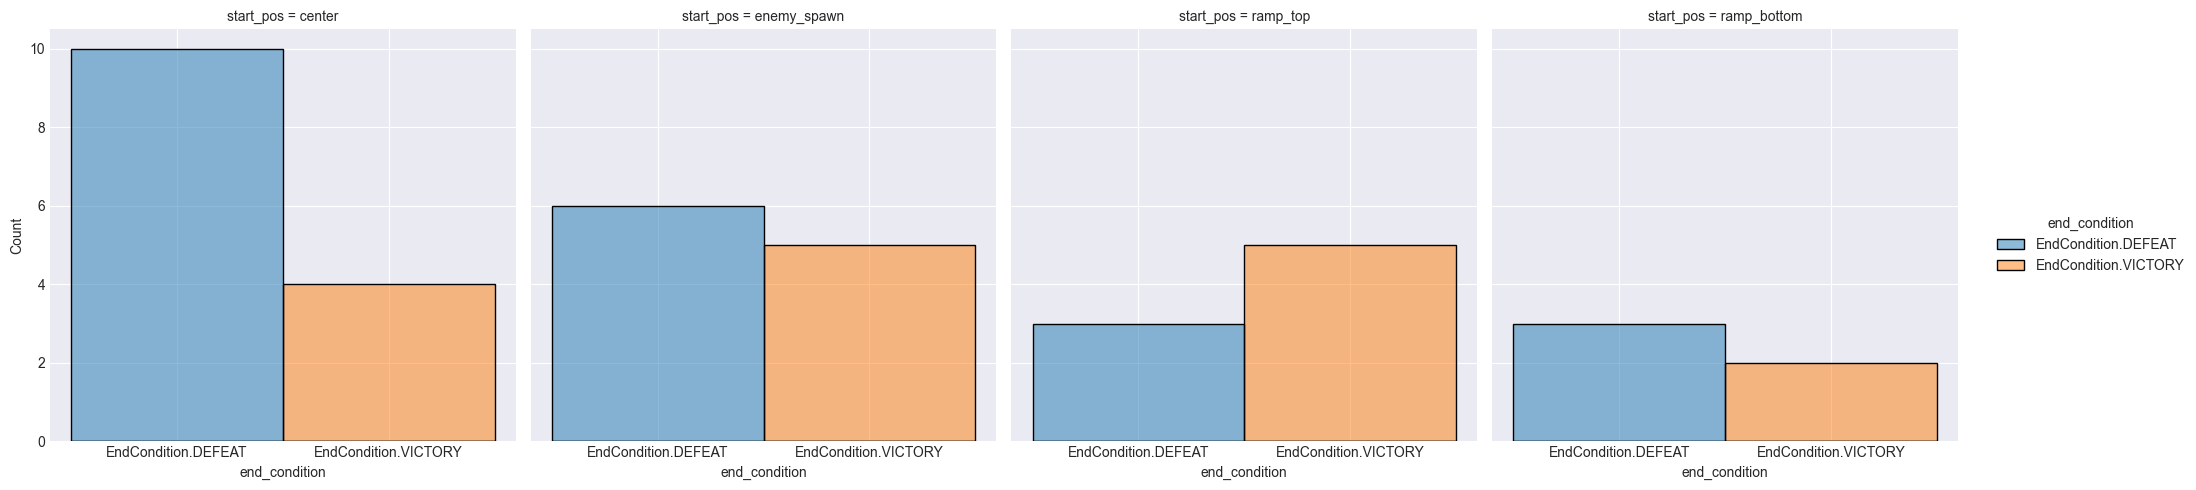

In [ ]:
sns.displot(df, x='end_condition', col="start_pos",hue="end_condition",binwidth=10)

plt.grid(True)
plt.show()

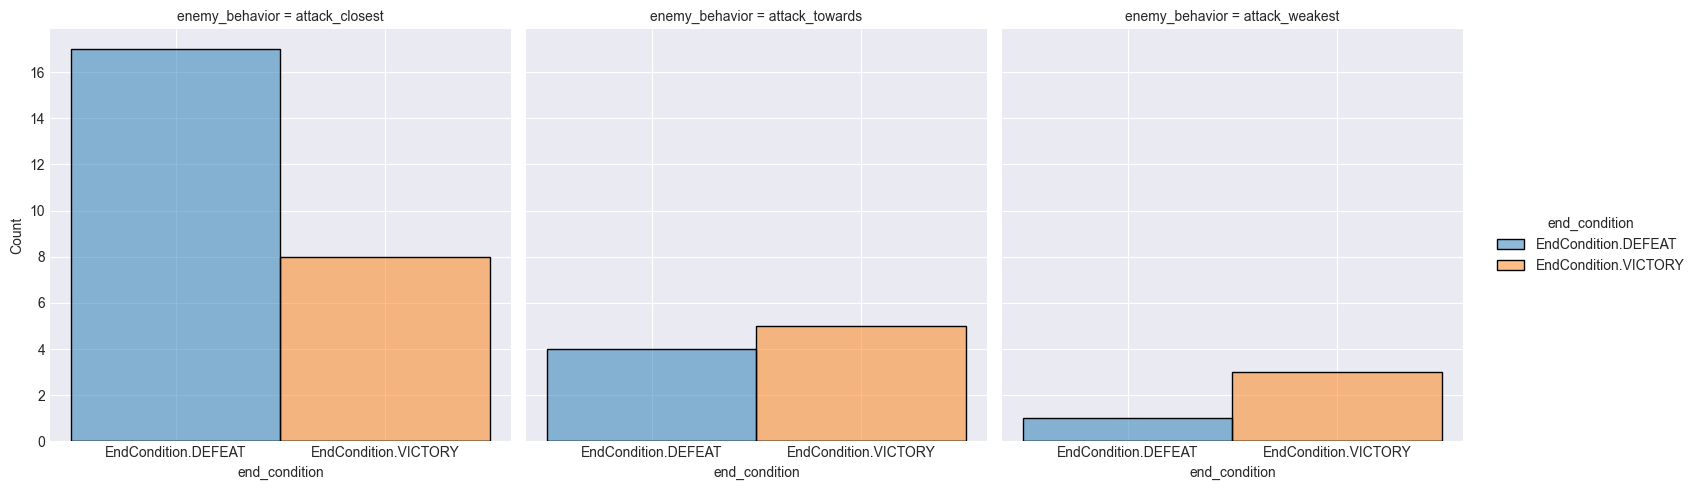

In [ ]:
sns.displot(df, x='end_condition', col="enemy_behavior",hue="end_condition",binwidth=10)

plt.grid(True)
plt.show()

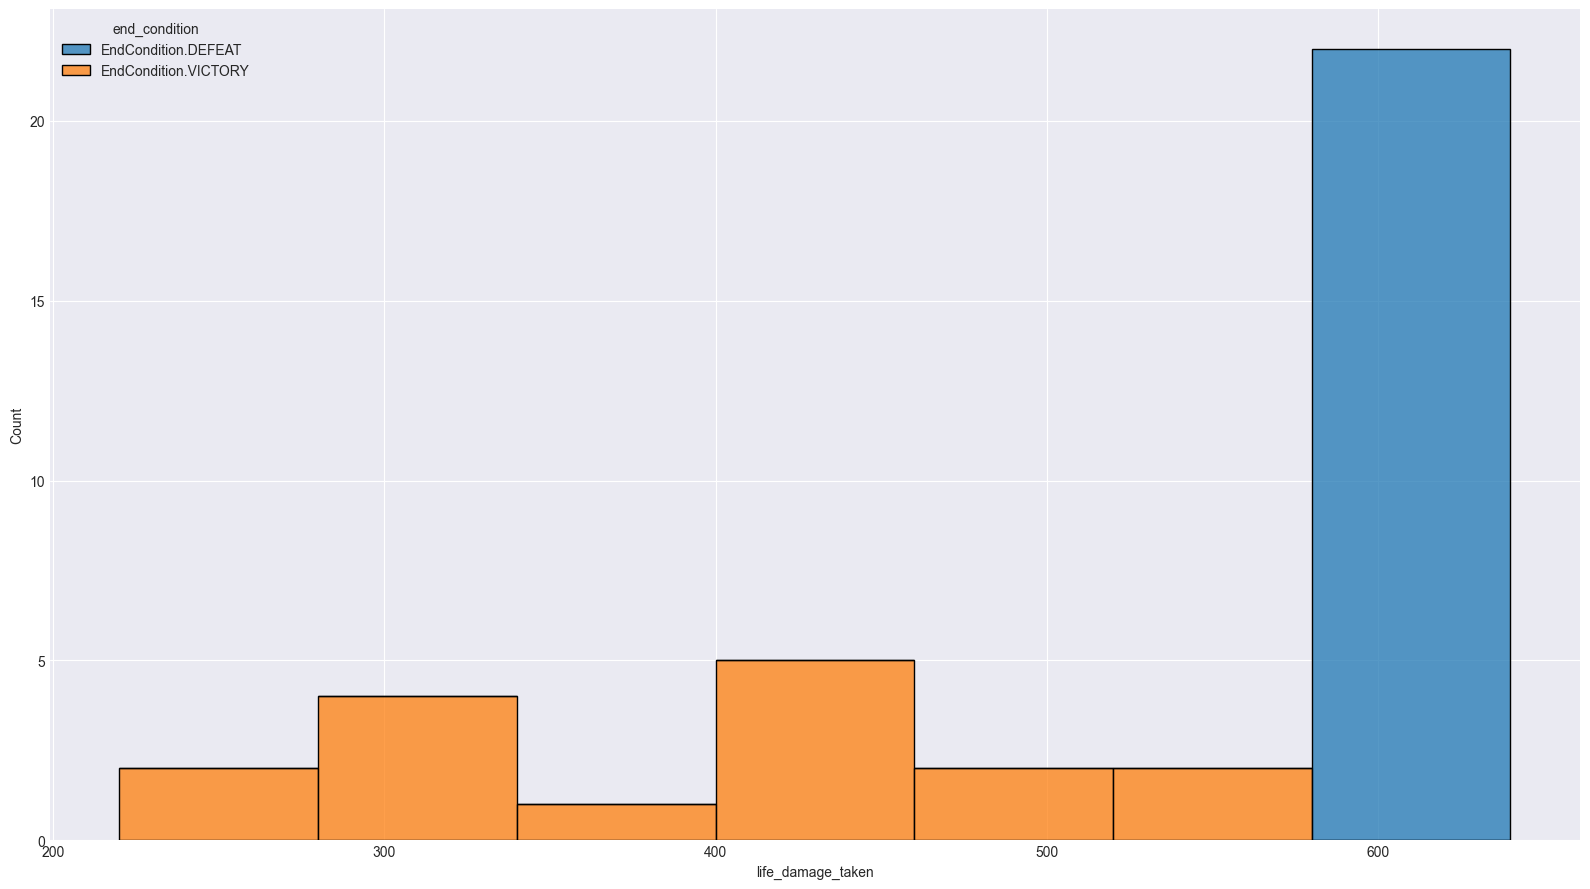

In [ ]:
sns.histplot(df, x='life_damage_taken', hue='end_condition',multiple="stack")

plt.grid(True)
plt.show()


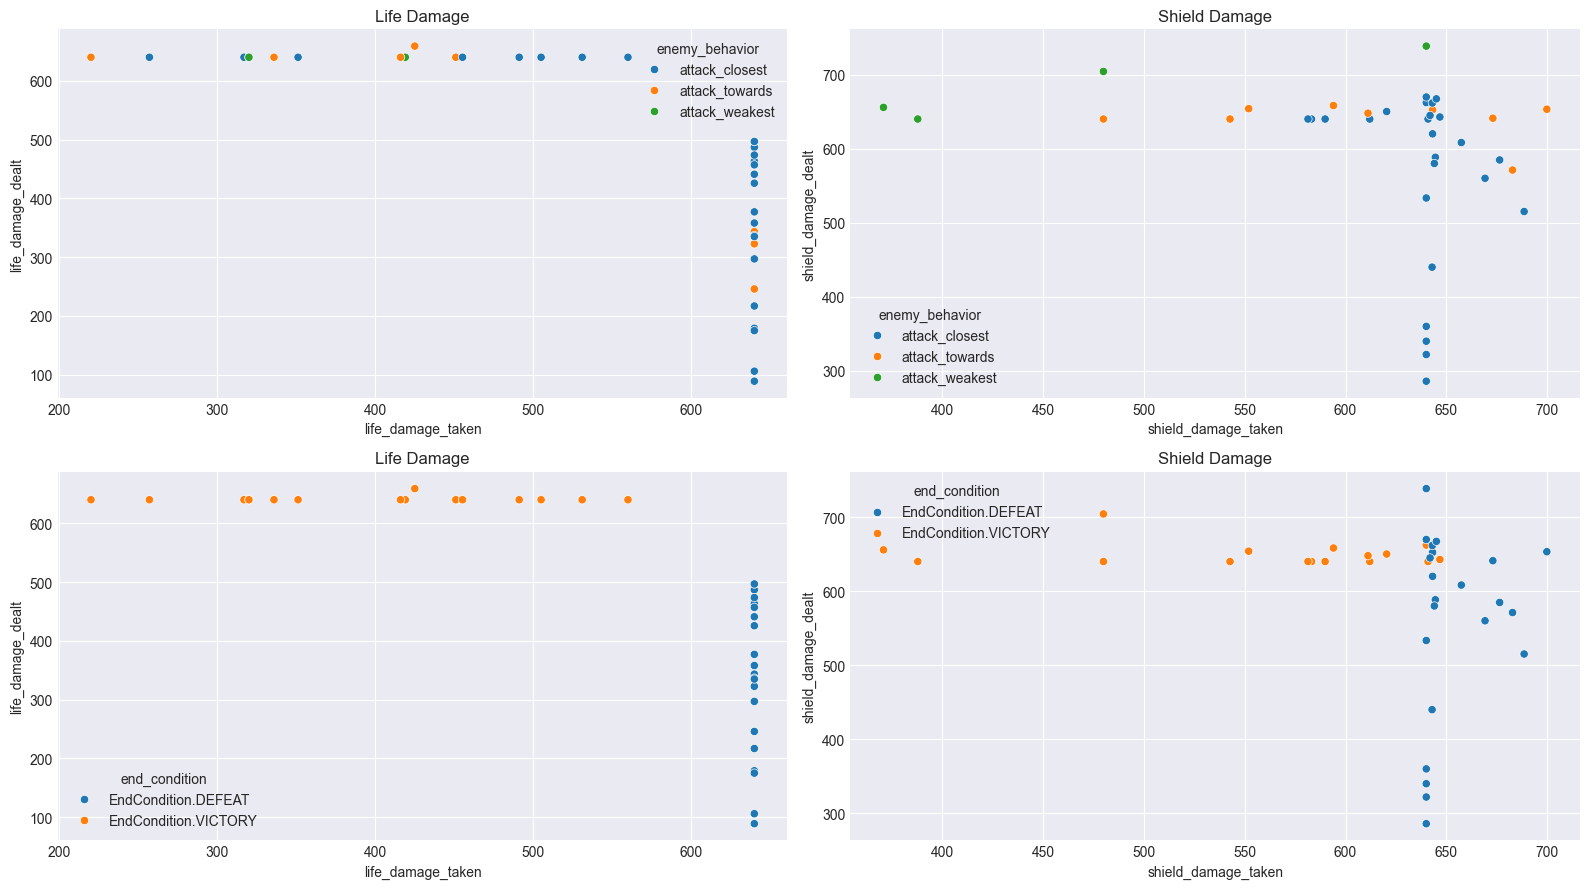

In [ ]:
fig, axes = plt.subplots(2, 2) #Increased figure height

sns.scatterplot(data=df, x="life_damage_taken", y="life_damage_dealt", hue="enemy_behavior", ax=axes[0, 0])
axes[0, 0].set_title("Life Damage")

sns.scatterplot(data=df, x="shield_damage_taken", y="shield_damage_dealt", hue="enemy_behavior", ax=axes[0, 1])
axes[0, 1].set_title("Shield Damage")

sns.scatterplot(data=df, x="life_damage_taken", y="life_damage_dealt", hue="end_condition", ax=axes[1, 0])
axes[1, 0].set_title("Life Damage")

sns.scatterplot(data=df, x="shield_damage_taken", y="shield_damage_dealt", hue="end_condition", ax=axes[1, 1])
axes[1, 1].set_title("Shield Damage")

plt.tight_layout()
plt.show()

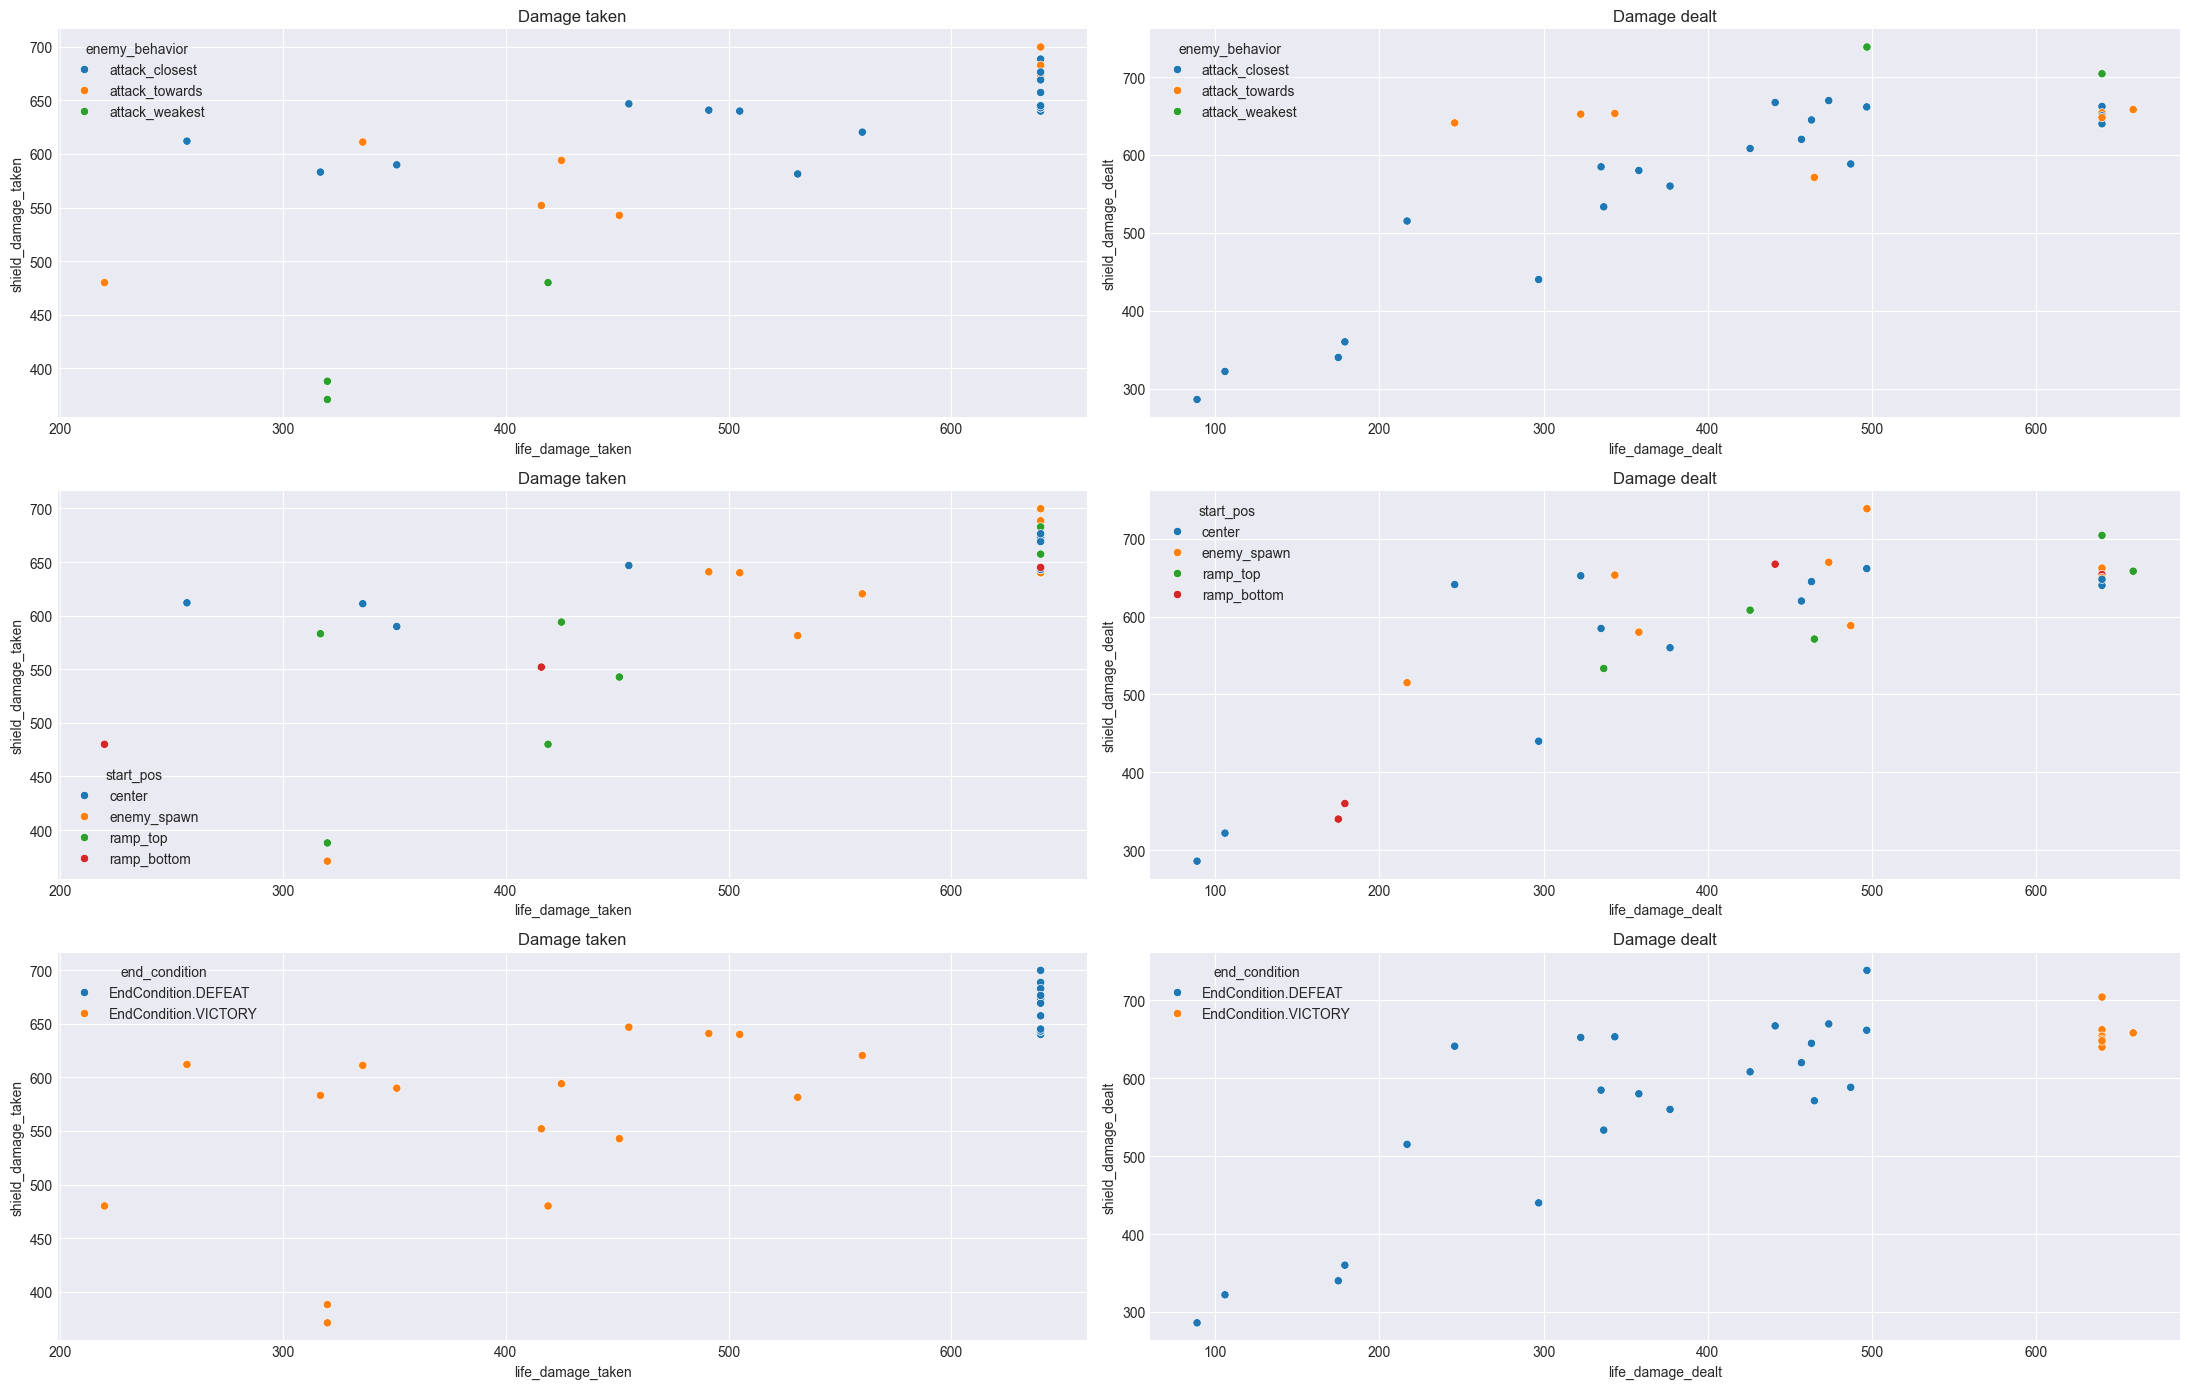

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(22, 14)) #Increased figure height

sns.scatterplot(data=df, x="life_damage_taken", y="shield_damage_taken", hue="enemy_behavior", ax=axes[0, 0])
#sns.lineplot(data=df, x="life_damage_taken", y="shield_damage_taken", hue="enemy_behavior", ax=axes[0, 0])
axes[0, 0].set_title("Damage taken")

sns.scatterplot(data=df, x="life_damage_dealt", y="shield_damage_dealt", hue="enemy_behavior", ax=axes[0,1])
#sns.lineplot(data=df, x="life_damage_dealt", y="shield_damage_dealt", hue="enemy_behavior", ax=axes[0,1])
axes[0, 1].set_title("Damage dealt")

sns.scatterplot(data=df, x="life_damage_taken", y="shield_damage_taken", hue="start_pos", ax=axes[1, 0])
axes[1, 0].set_title("Damage taken")

sns.scatterplot(data=df, x="life_damage_dealt", y="shield_damage_dealt", hue="start_pos", ax=axes[1,1])
axes[1, 1].set_title("Damage dealt")

sns.scatterplot(data=df, x="life_damage_taken", y="shield_damage_taken", hue="end_condition", ax=axes[2, 0])
axes[2, 0].set_title("Damage taken")

sns.scatterplot(data=df, x="life_damage_dealt", y="shield_damage_dealt", hue="end_condition", ax=axes[2,1])
axes[2, 1].set_title("Damage dealt")

plt.tight_layout()
plt.show()